# Generative Modeling
### Sampling from a Bayes Classifier
- since we are not concerned with classification, we aren't concerned with evaluation

In [1]:
import python_utils
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import pandas as pd
from sklearn.utils import shuffle

#https://github.com/lazyprogrammer/machine_learning_examples/blob/master/unsupervised_class3/util.py

#### A simple Bayes Classifier class

In [2]:
class BayesClassifier:
    def __init__(self):
        self.k = 0
        self.gaussians = []
    
    def fit(self, X, y):
        """
            Descr: Fit a set of observations and labels to a gaussian distribution
            
            Params:
                X: the observations
                y: the labels
        """
        self.k = len(set(y))
        # classes are 0...k-1
        print("using simple gaussian model")
        for k in range(self.k):
            Xk = X[y == k]
            mu = Xk.mean(axis=0)
            sigma = np.cov(Xk.T)
            gaussian = {'mu': mu, 'sigma': sigma}
            self.gaussians.append(gaussian)
            
    def sample_given_y(self, y):
        """
            Descr: Sample a distribution
            
            Params:
                y: the distribution to sample (label)
                
            Returns: an observation from the distribution
        """
        gaussian = self.gaussians[y]
        return mvn.rvs(mean=gaussian['mu'], cov=gaussian['sigma'])
        
    def sample(self):
        """
            Descr: Sample a random class from a uniform distribution
            
            Returns: an observation from a random class
        """
        y = np.random.randint(self.k)
        return self.sample_given_y(y)
    

#### Get the data

In [3]:
def get_mnist(file,limit=None):
    df = pd.read_csv('datasets/mnist_train_kaggle.csv')
    data = df.values
    # np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    X, Y = shuffle(X, Y)
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

Fit the classifier

In [4]:
X, y = get_mnist('datasets/mnist_train_kaggle.csv')
clf = BayesClassifier()
clf.fit(X,y)

using simple gaussian model


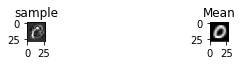

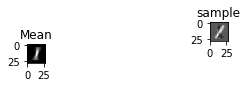

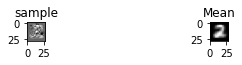

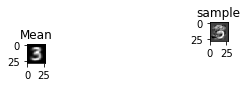

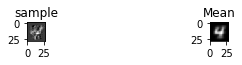

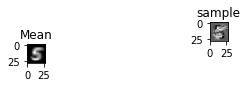

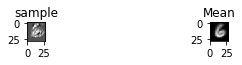

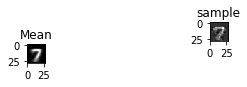

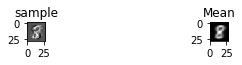

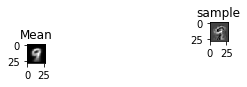

In [5]:
for k in range(clf.k):
    sample = clf.sample_given_y(k).reshape(28,28)
    mu = clf.gaussians[k]['mu'].reshape(28,28)
    
    plt.subplot(10,2,k+1)
    plt.imshow(sample, cmap='gray')
    plt.title("sample")
    
    plt.subplot(10,2,k+2)
    plt.imshow(mu, cmap='gray')
    plt.title("Mean")
    plt.show()

#### Generate a random sample

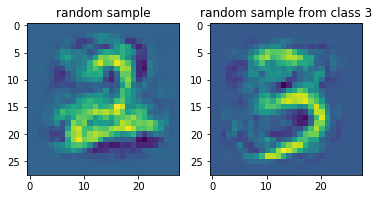

In [6]:
sample = clf.sample().reshape(28,28)
sample3 = clf.sample_given_y(3).reshape(28,28)

plt.subplot(121)
plt.imshow(sample)
plt.title("random sample")

plt.subplot(122)
plt.imshow(sample3)
plt.title("random sample from class 3")

plt.show()

## Gaussian Mixture
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html

In [7]:
from sklearn.mixture import BayesianGaussianMixture

### The improved Bayes Classifier

In [30]:
class ImprovedBayesClassifier(BayesClassifier):
    """
        Inherits from simple classifier
        overrides fit and sample_given_y
    """
    def __init__(self):
        #BayesClassifier.__init__(self)
        super().__init__() # also works
        
    def fit(self, X, y):
        print("using improved gaussian mixture model")
        self.k = len(set(y))
        for k in range(0, self.k):
            Xk = X[y==k]
            gmm = BayesianGaussianMixture(10)
            gmm.fit(Xk)
            self.gaussians.append(gmm)
            
    def sample_given_y(self, y):
        gmm = self.gaussians[y]
        sample = gmm.sample()
        mu = gmm.means_[sample[1]].reshape(28,28)
        sample = sample[0].reshape(28,28)
        return sample, mu
        

In [31]:
clf_gmm = ImprovedBayesClassifier()
clf_gmm.fit(X,y)

using improved gaussian mixture model


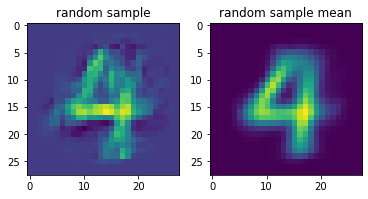

In [37]:
sample = clf_gmm.sample()
mean   = sample[1].reshape(28,28)
sample = sample[0].reshape(28,28)

plt.subplot(121)
plt.imshow(sample)
plt.title("random sample")

plt.subplot(122)
plt.imshow(mean)
plt.title("random sample mean")

plt.show()

The samples are clearer!